# II. Community Detection

In [9]:
%run functions_2.ipynb

Part 2 functions imported.


In [10]:
# For this task use the weight matrix W and the adjacency matrix A.
weight_matrix = np.genfromtxt("data/sgb128Nodes41to80_weight20.txt", delimiter=' ', skip_header=1)
G = nx.Graph(weight_matrix)

adj_matrix = np.genfromtxt("data/sgb128Nodes41to80_adj20.txt", delimiter=' ', skip_header=1)
A = nx.Graph(adj_matrix)

In [11]:
G.edges(data='weight')

EdgeDataView([(0, 1, 0.830608), (0, 2, 0.34667), (0, 6, 0.245987), (0, 7, 0.204128), (0, 8, 0.302466), (0, 9, 0.32628), (0, 10, 0.460031), (0, 11, 0.472407), (0, 12, 0.415199), (0, 13, 0.597954), (0, 16, 0.532307), (0, 17, 0.419471), (0, 20, 0.252736), (0, 21, 0.302992), (0, 23, 0.30811), (0, 24, 0.398092), (0, 25, 0.4332), (0, 27, 0.437125), (0, 29, 0.35824), (0, 30, 0.191408), (0, 31, 0.215857), (0, 32, 0.474821), (0, 33, 0.338312), (0, 35, 0.327114), (0, 36, 0.891121), (0, 37, 0.388643), (1, 2, 0.409939), (1, 6, 0.269727), (1, 7, 0.204912), (1, 8, 0.363579), (1, 9, 0.33959), (1, 10, 0.523526), (1, 11, 0.525684), (1, 12, 0.344946), (1, 13, 0.496738), (1, 16, 0.454625), (1, 17, 0.367168), (1, 20, 0.291425), (1, 21, 0.297213), (1, 23, 0.287988), (1, 24, 0.408), (1, 25, 0.520452), (1, 27, 0.510226), (1, 29, 0.392144), (1, 30, 0.230198), (1, 31, 0.259758), (1, 32, 0.527864), (1, 33, 0.387145), (1, 35, 0.382328), (1, 36, 0.741427), (1, 37, 0.467863), (2, 4, 0.354545), (2, 6, 0.200884), (2

In [12]:
# Implement the three community detection algorithms (partition algorithms)
# based on sectral method, and run them on your project data set.
# Specifically, implement:
#  Spectral methods using W
#  Spectral methods using ∆
#  Spectral methods using ̃∆

In [13]:
# 1. For each of the three algorithms above, determine sets S and ̄Sbar = {1, 2, . . . , n} \ S.
comp_weight = spectral_algorithm_weight(G)
comp_lap = spectral_algorithm_laplacian(G)
comp_norm_lap = spectral_algorithm_normalized_laplacian(G)
print(comp_weight, comp_lap, comp_norm_lap, sep="\n")

({0, 1, 2, 4, 7, 8, 9, 39, 11, 12, 13, 15, 17, 21, 23, 25, 26, 28}, {3, 5, 6, 10, 14, 16, 18, 19, 20, 22, 24, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38})
({32, 33, 2, 3, 4, 34, 37, 39, 9, 10, 11, 12, 16, 17, 18, 24, 25, 28}, {0, 1, 5, 6, 7, 8, 13, 14, 15, 19, 20, 21, 22, 23, 26, 27, 29, 30, 31, 35, 36, 38})
({0, 2, 34, 36, 5, 37, 7, 38, 11, 14, 15, 16, 17, 19, 20, 21, 23, 30}, {1, 3, 4, 6, 8, 9, 10, 12, 13, 18, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 39})


In [31]:
# 2. Compute the agreement matrix between these partitions: The output
# should be a 3 × 3 matrix Agr so that Agr(k, l) represents the partition
# agreement between method k and method l, 1 ≤ k, l ≤ 3, the 3 methods
# above.
from itertools import product

partition_agreement = lambda p1, p2: len(p1 & p2) 
agreement = lambda two_partitions: max(partition_agreement(p1,p2) for p1, p2 in product(*two_partitions))

partitions = [comp_weight, comp_lap, comp_norm_lap]
#First_Agr = np.array([[(partition_agreement(p1[0], p2[0])+partition_agreement(p1[1], p2[1]))/40 for p1 in partitions] for p2 in partitions])
#display(First_Agr)
#Agr = np.array([[agreement((p1, p2)) for p1 in partitions] for p2 in partitions])
Agr = np.array([[
            max((partition_agreement(p1[i], p2[j])+partition_agreement(p1[1-i], p2[1-j]))/G.number_of_nodes() for i in [0,1] for j in [0,1])
                       for p1 in partitions] for p2 in partitions])
display(Agr)

array([[1.  , 0.55, 0.5 ],
       [0.55, 1.  , 0.6 ],
       [0.5 , 0.6 , 1.  ]])

.|Weight | Laplacian | Normalized Laplacian
-|-|-|-
Weight | 40 | 23 | 21
Laplacian | 23 | 40 | 16 
Normalized Laplacian | 21 | 16 | 40

In [18]:
# 3. For visualization, for each of the three algorithms, map the two commu-
# nities using two colors, say red and blue, using the coordinates (X, Y )
# from from the coordinate file assigned to your project. 

coords = np.genfromtxt("data/sgb128Nodes41to80_coord.txt", delimiter=' ', skip_header=0)
pos = dict(zip(range(40), coords[:,:2]))
print(pos)
labels = {n:n+41 for n in range(40)}

# For each algorithm produce two figures as follows:

{0: array([-6050.69,  2294.65]), 1: array([-6129.46,  2367.2 ]), 2: array([-6626.97,  2498.48]), 3: array([-7667.55,  2226.26]), 4: array([-7221.19,  2568.27]), 5: array([-5166.26,  2779.7 ]), 6: array([-5916.64,  3092.7 ]), 7: array([-5484.79,  3016.03]), 8: array([-6610.36,  2698.17]), 9: array([-5772.25,  2877.83]), 10: array([-6498.45,  2309.87]), 11: array([-6039.65,  2727.21]), 12: array([-5696.92,  1931.22]), 13: array([-5823.36,  2103.96]), 14: array([-8459.38,  3264.08]), 15: array([-5261.63,  2974.55]), 16: array([-5689.32,  2252.5 ]), 17: array([-5551.82,  2343.71]), 18: array([-5195.3 ,  2832.23]), 19: array([-8380.61,  2622.85]), 20: array([-6188.88,  3076.14]), 21: array([-5570.49,  2788.7 ]), 22: array([-7132.05,  2806.65]), 23: array([-5463.38,  2636.  ]), 24: array([-5790.89,  2758.28]), 25: array([-6445.93,  2571.74]), 26: array([-5015.64,  2908.91]), 27: array([-6194.43,  2749.99]), 28: array([-8112.52,  3293.77]), 29: array([-5959.5 ,  2879.91]), 30: array([-6683.62

In [19]:
# (a) Draw edges according to the adjacency matrix A, each edge with
# same color and same width;
def show_partition(partition_nodes_sets, weighted_edge=False, max_width=5):
    plt.figure(figsize=(30,20))
    colors = ['red' if node in partition_nodes_sets[0] else 'dodgerblue' for node in range(40)]
    if not weighted_edge:
        nx.draw_networkx(G, pos=pos, node_color=colors, with_labels=False, node_size=1000, width=max_width/2.5)
    else:
        nx.draw_networkx_nodes(G, pos=pos, node_color=colors, node_size=1000)
        for edge in G.edges(data='weight'):
            nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2]*max_width)
    nx.draw_networkx_labels(G, pos=pos, labels=labels)

{0: Text(-6050.69, 2294.65, '41'),
 1: Text(-6129.46, 2367.2, '42'),
 2: Text(-6626.97, 2498.48, '43'),
 3: Text(-7667.55, 2226.26, '44'),
 4: Text(-7221.19, 2568.27, '45'),
 5: Text(-5166.26, 2779.7, '46'),
 6: Text(-5916.64, 3092.7, '47'),
 7: Text(-5484.79, 3016.03, '48'),
 8: Text(-6610.36, 2698.17, '49'),
 9: Text(-5772.25, 2877.83, '50'),
 10: Text(-6498.45, 2309.87, '51'),
 11: Text(-6039.65, 2727.21, '52'),
 12: Text(-5696.92, 1931.22, '53'),
 13: Text(-5823.36, 2103.96, '54'),
 14: Text(-8459.38, 3264.08, '55'),
 15: Text(-5261.63, 2974.55, '56'),
 16: Text(-5689.32, 2252.5, '57'),
 17: Text(-5551.82, 2343.71, '58'),
 18: Text(-5195.3, 2832.23, '59'),
 19: Text(-8380.61, 2622.85, '60'),
 20: Text(-6188.88, 3076.14, '61'),
 21: Text(-5570.49, 2788.7, '62'),
 22: Text(-7132.05, 2806.65, '63'),
 23: Text(-5463.38, 2636.0, '64'),
 24: Text(-5790.89, 2758.28, '65'),
 25: Text(-6445.93, 2571.74, '66'),
 26: Text(-5015.64, 2908.91, '67'),
 27: Text(-6194.43, 2749.99, '68'),
 28: Text

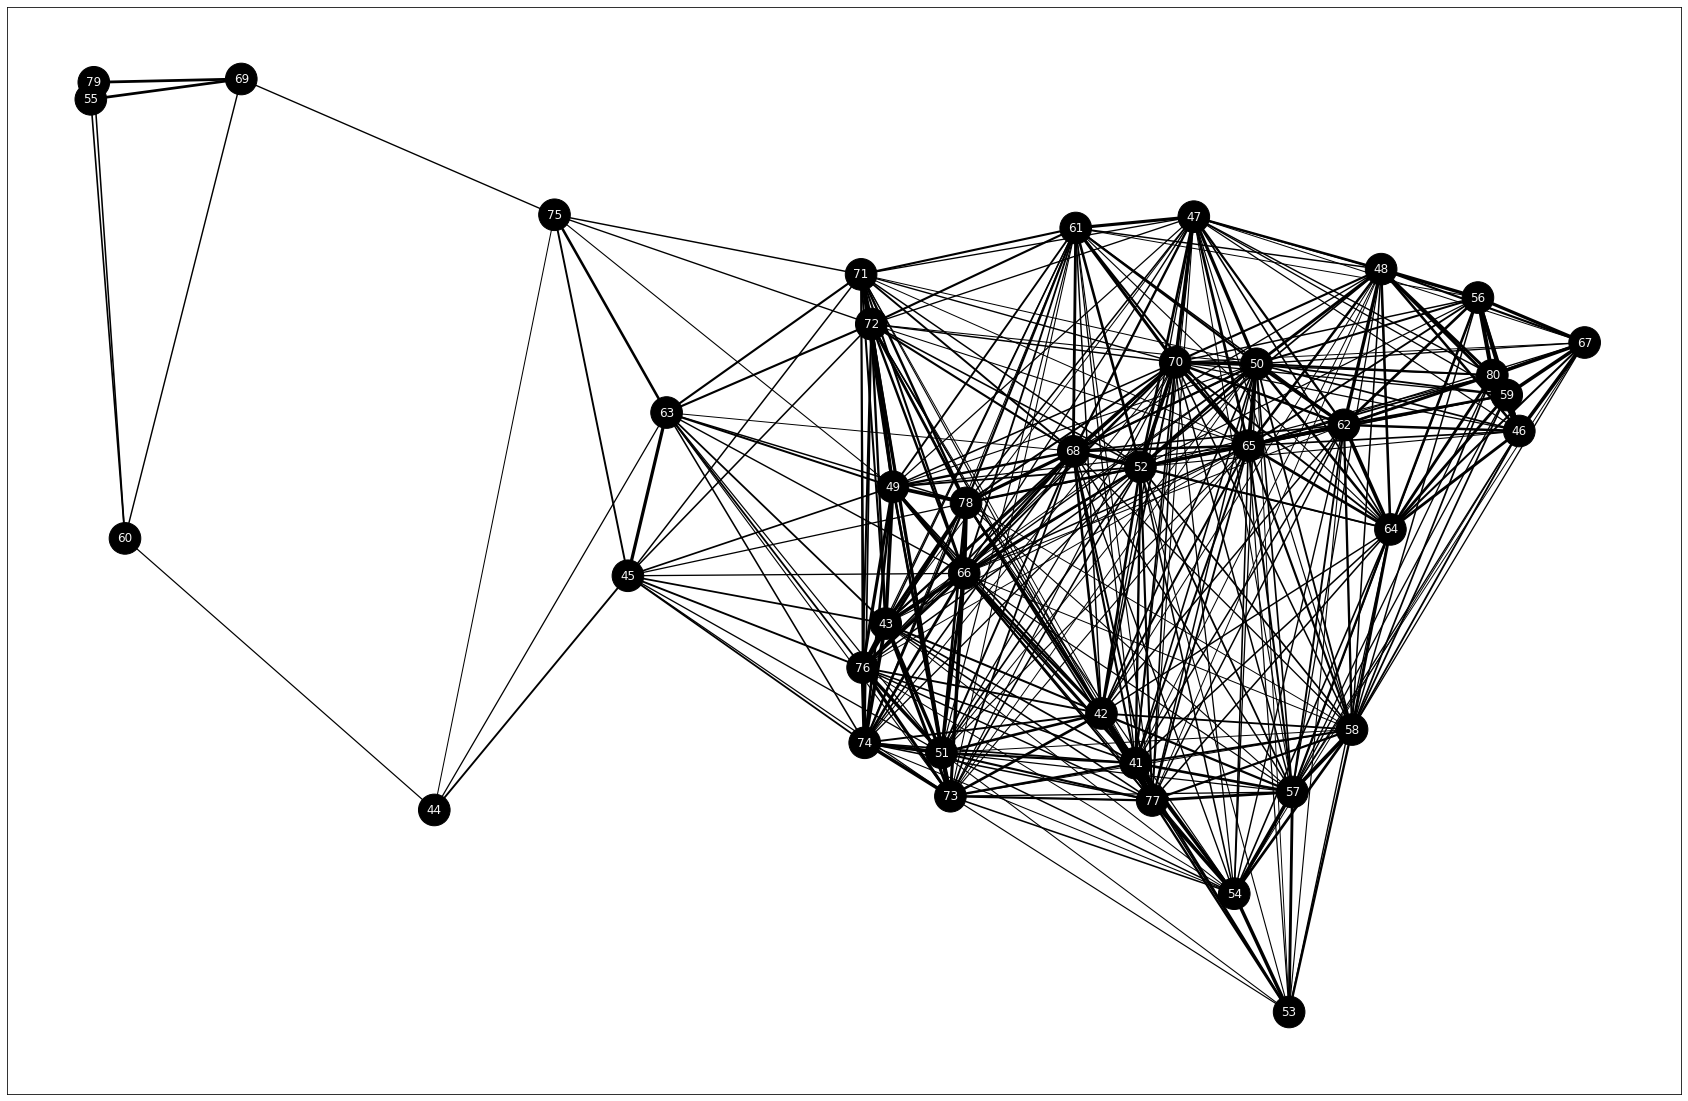

In [20]:
fig, ax = plt.subplots(figsize=(30,20))

#img = plt.imread('images/us_outline.gif')
#ax.imshow(img, zorder=0, origin='upper',extent=[0,.5,0,.5])

colors = ['black']*40
nx.draw_networkx_nodes(G, pos=pos, node_color=colors, ax=ax, node_size=1000)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2]*5, ax=ax)
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_color="whitesmoke", ax=ax)



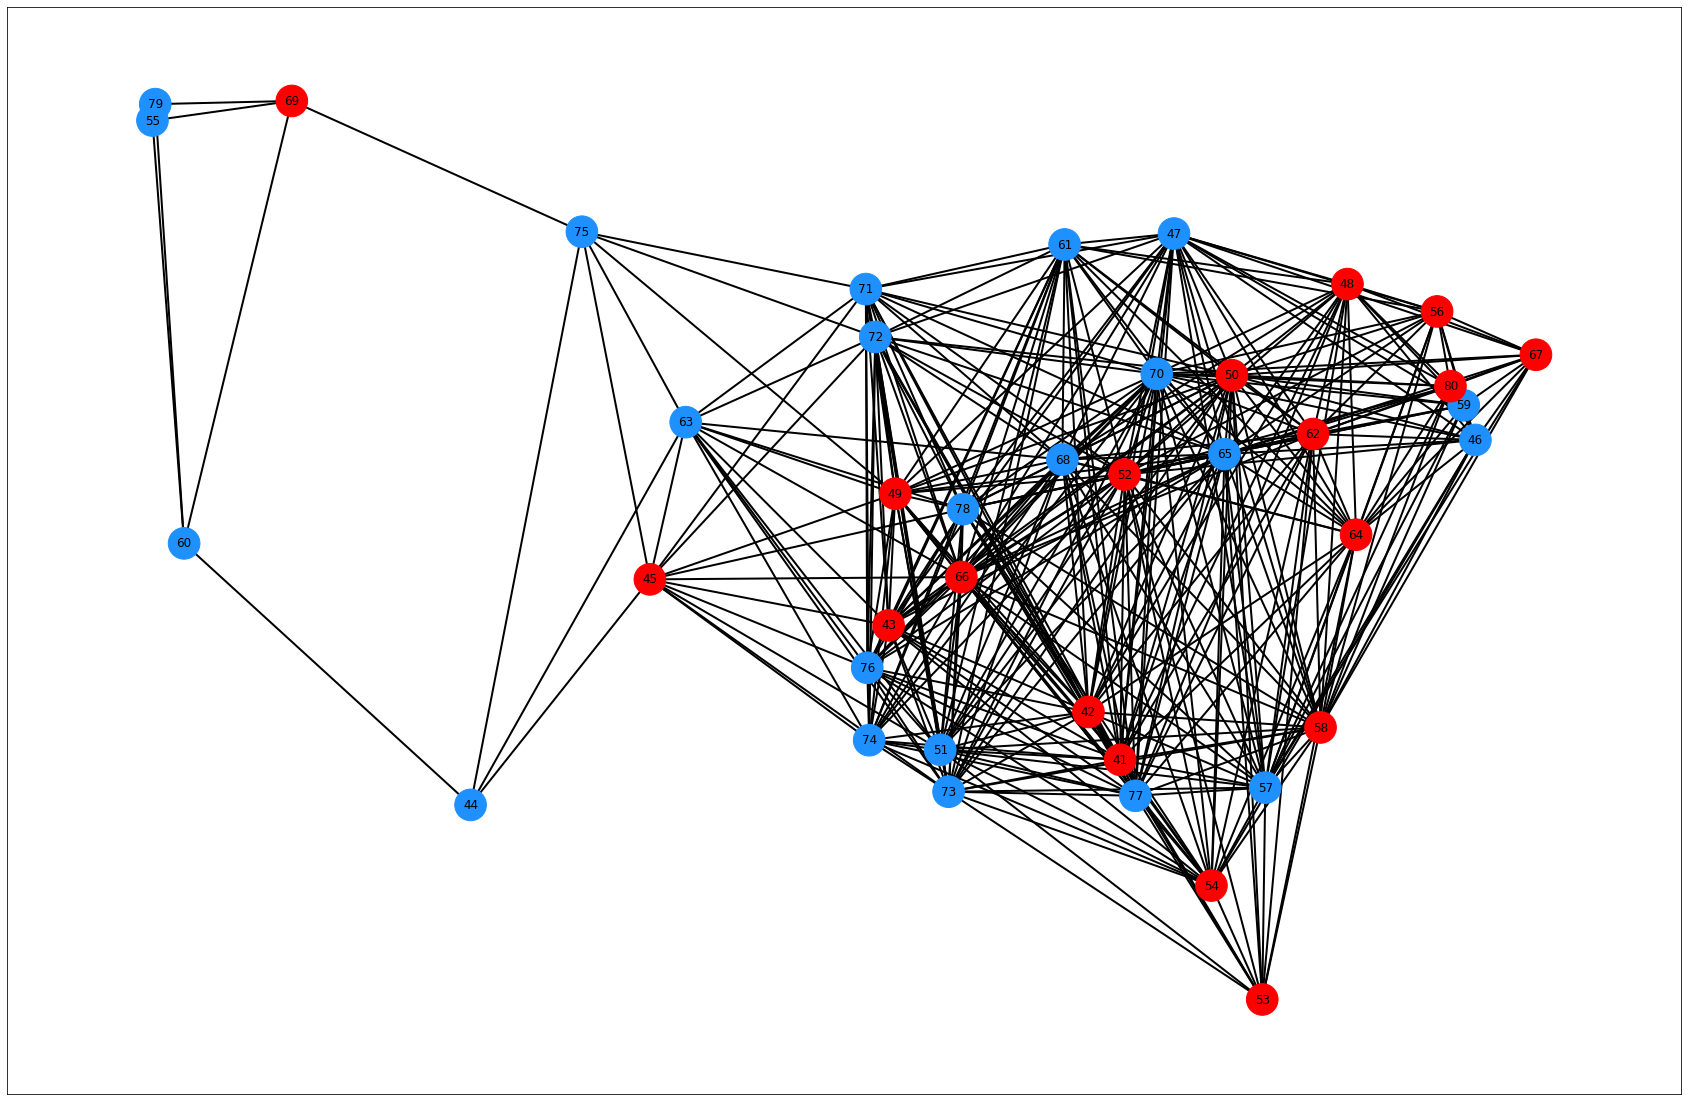

In [21]:
show_partition(comp_weight)

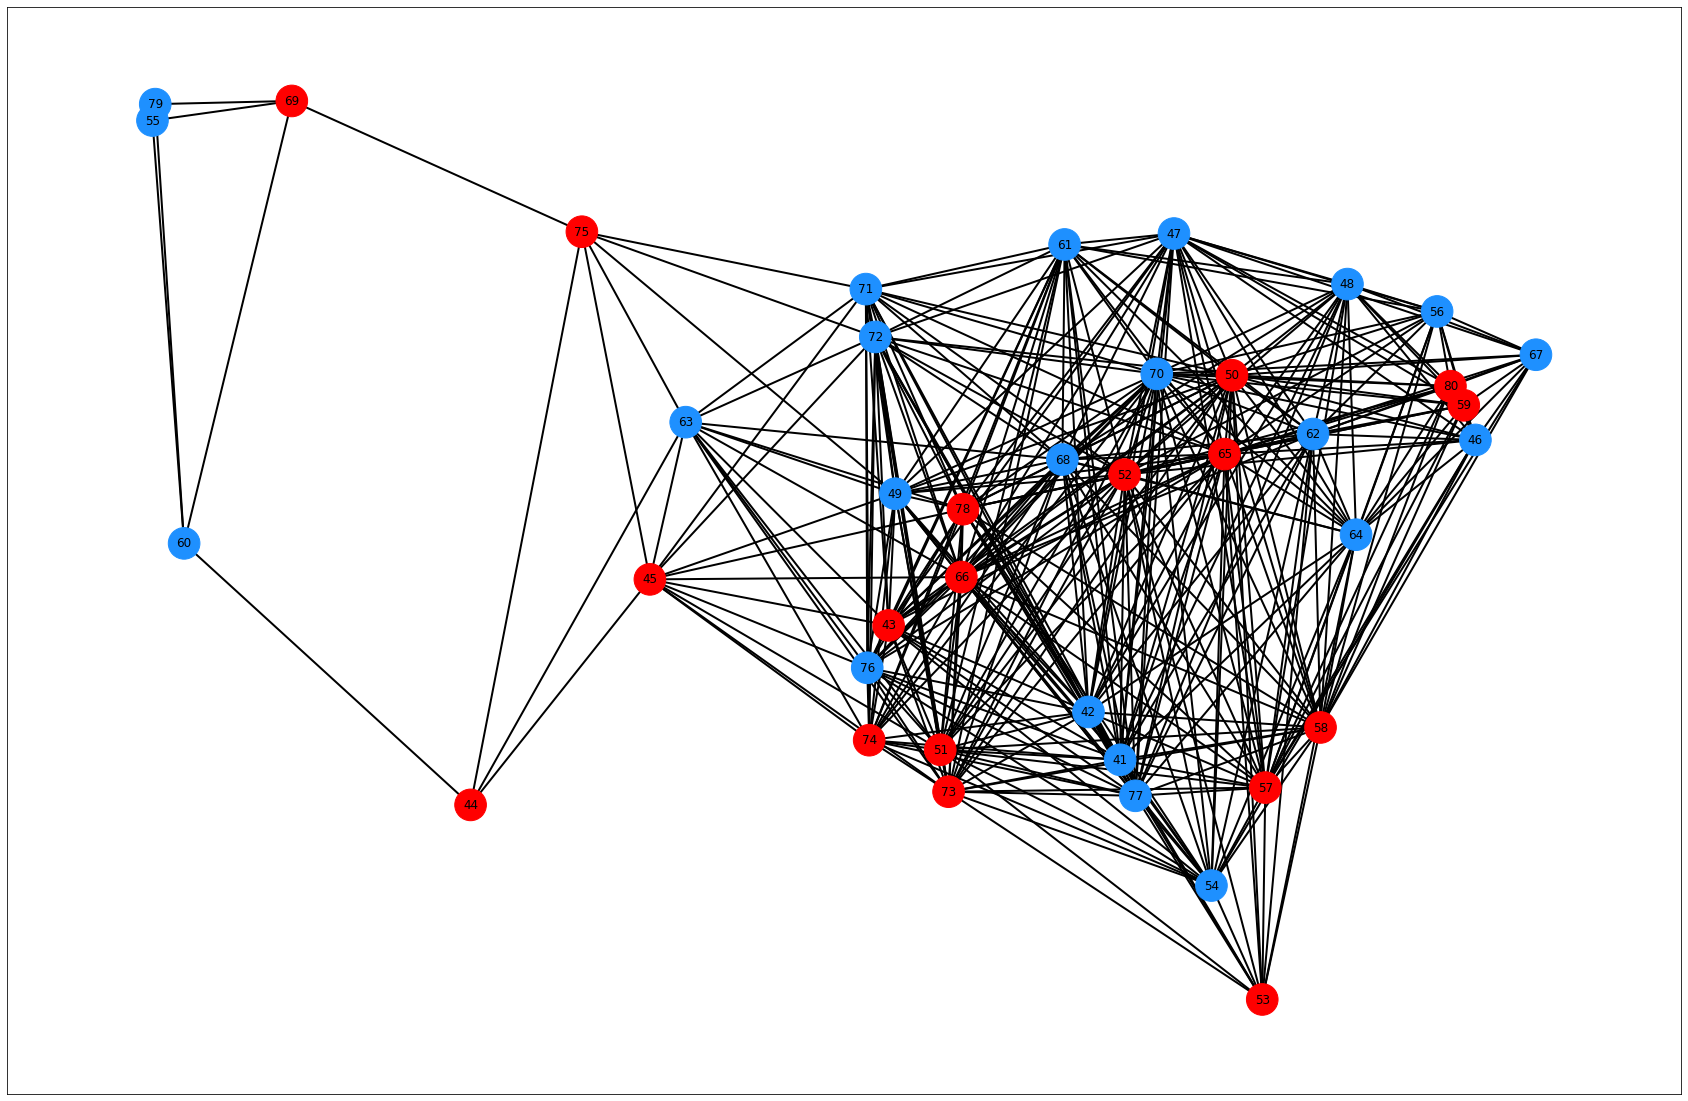

In [22]:
show_partition(comp_lap)

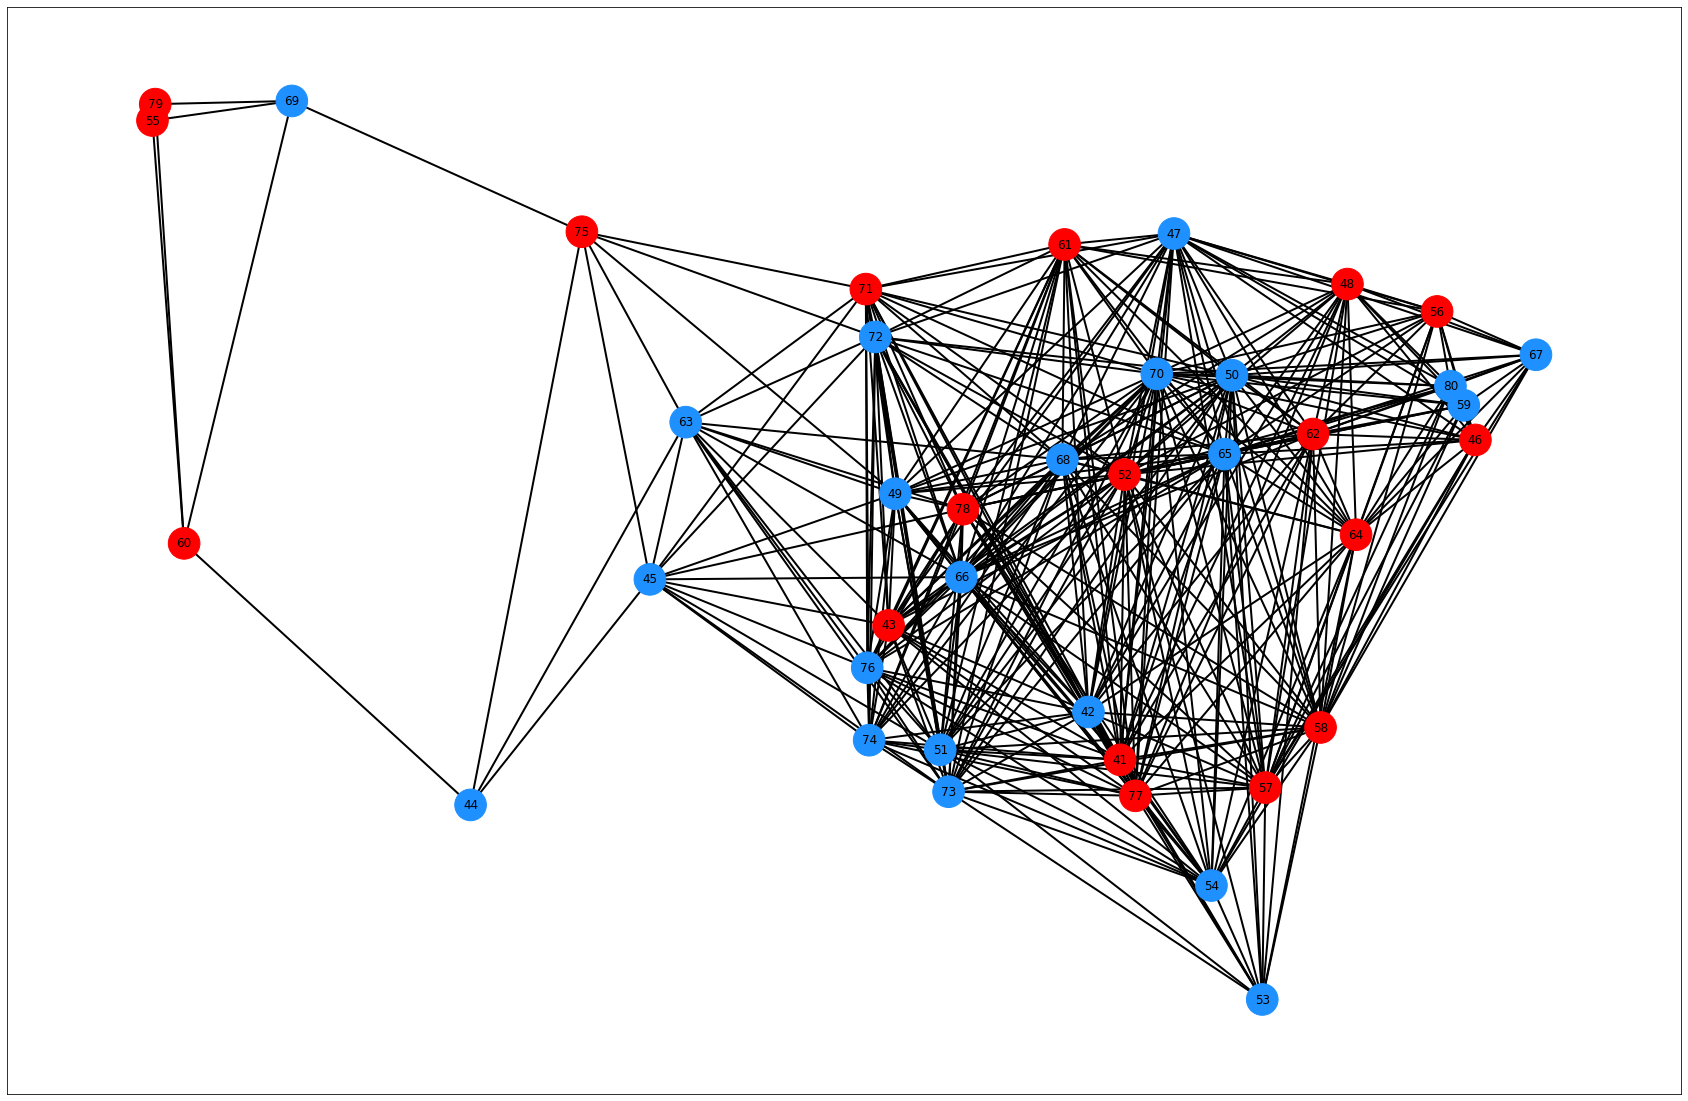

In [23]:
show_partition(comp_norm_lap)

In [24]:
# (b) Draw edges according to the weight matrix W , each edge with same
# color and but different width, the larger the weight, the thicker the
# edge.

In [25]:
show_partition(comp_weight, True)

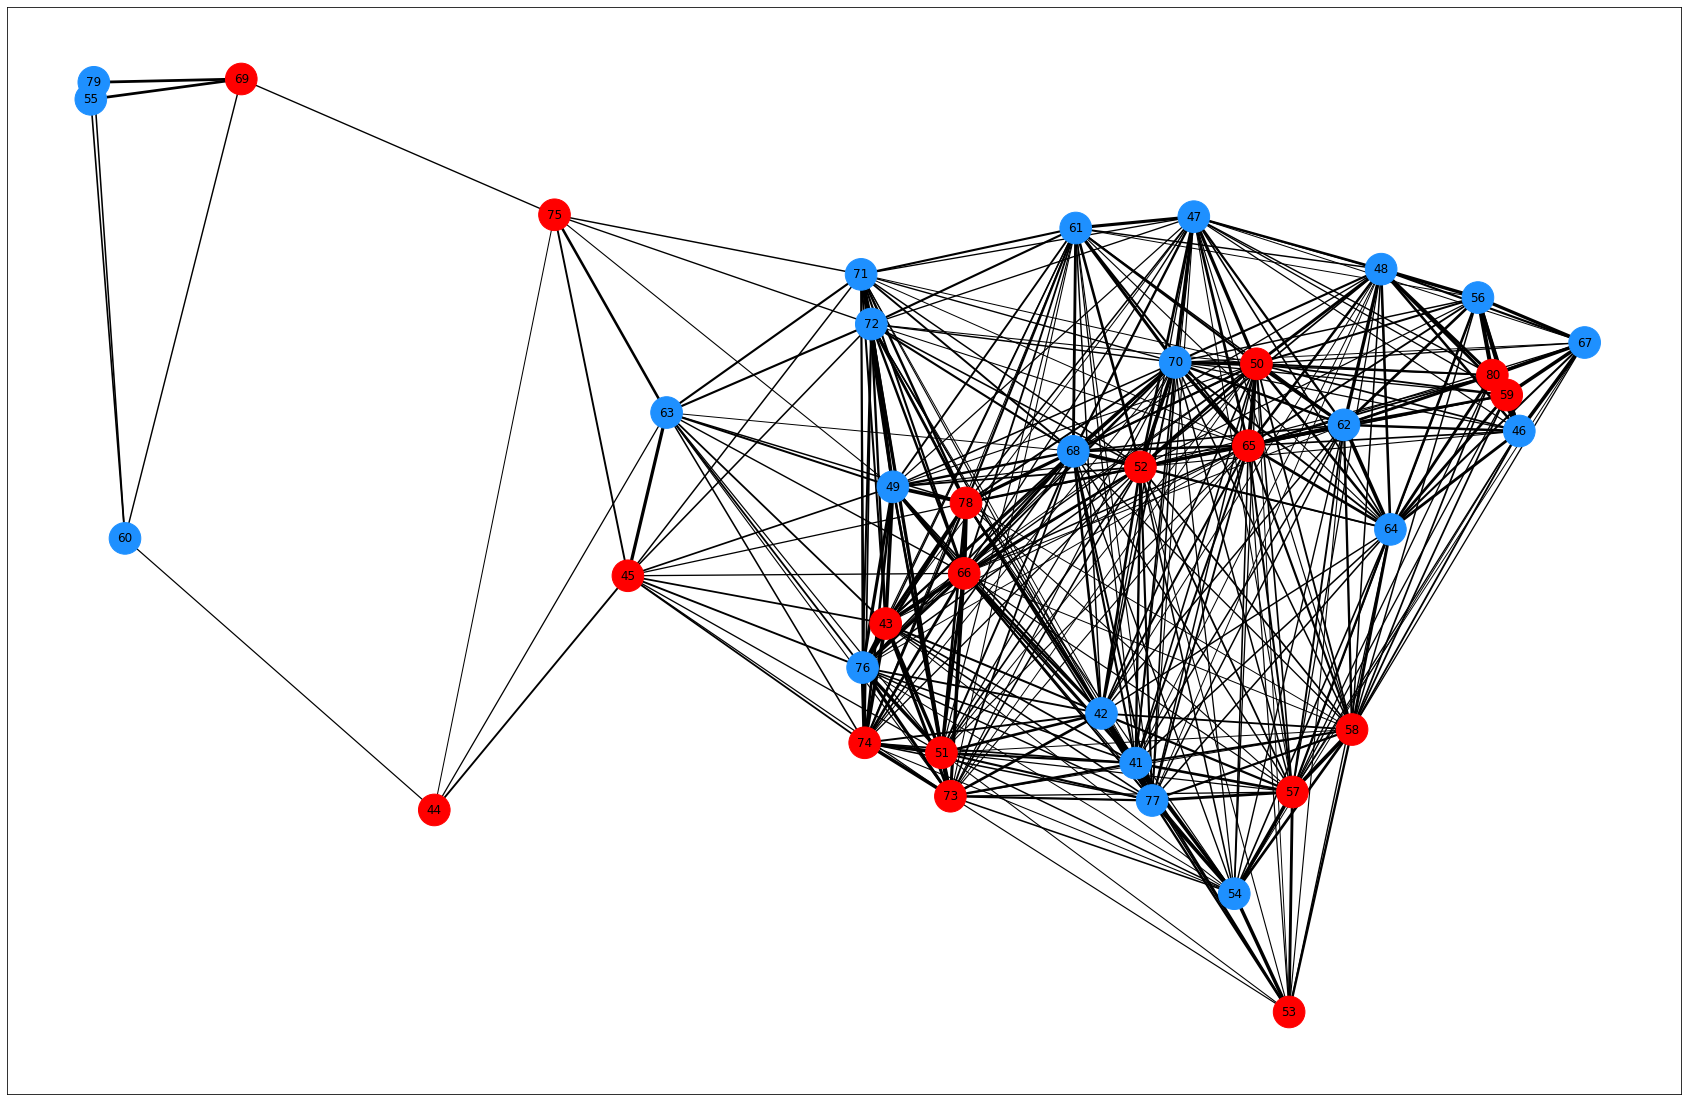

In [26]:
show_partition(comp_lap, True)

In [27]:
show_partition(comp_norm_lap, True)